**GRIP June-21 Batch : Data Science and Business and Analytics Internship**

**Author: Anjali Tiwari**

**Task 1: Prediction using Supervised ML**

**●Predict the percentage of a student based on the no. of study hours.**

**● What will be predicted score if a student studies for 9.25 hrs/ day?** 


In [1]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
#Import Data
df= pd.read_csv("http://bit.ly/w-data")


In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Data Imported successfully!!**

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.shape

(25, 2)

*Total 25 observations with 2 variables.*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting the distribution of scores

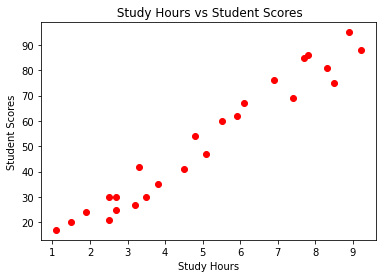

In [9]:
plt.scatter(x=df.Hours, y=df.Scores, color='r')
plt.title(" Study Hours vs Student Scores")
plt.xlabel("Study Hours")
plt.ylabel("Student Scores")
plt.show()

To confirm the correlation,we plot a regression line using corr function 

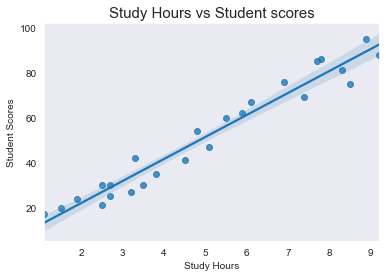

In [10]:
sns.set_style('dark')
sns.regplot(y=df['Scores'],x=df['Hours'])
plt.title("Study Hours vs Student scores", size= 15)
plt.xlabel("Study Hours")
plt.ylabel("Student Scores")
plt.show()

from the above graph , we can see that there is a positive relationship between the numbers of Hours studied and percentage

**Training the Data Model**

A) Spliting the Data

B) Fitting the Data set into the model

In [11]:
x=df.iloc[:,:-1].values # x as no. of study hours
y=df.iloc[:,1].values   # y as Marks obtained

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25) #splitting the dataset

In [13]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Predicting the marks(using Model)

In [15]:
y_pred=model.predict(x_test)
prediction=pd.DataFrame({'Hours':[i[0] for i in x_test], 'Predicted Marks': [k for k in y_test]})
prediction

,Hours,Predicted Marks
0,2.7,30
1,6.1,67
2,5.5,60
3,5.9,62
4,5.1,47
5,7.4,69
6,4.5,41


In [16]:
comparison= pd.DataFrame({'predicted Marks': y_pred, 'Actual Marks':y_test})
comparison

,predicted Marks,Actual Marks
0,29.064321,30
1,62.448208,67
2,56.556934,60
3,60.484450,62
4,52.629418,47
5,75.212636,69
6,46.738144,41


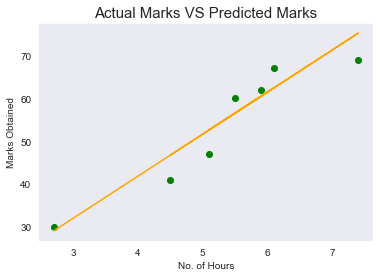

In [17]:
plt.scatter(x=x_test, y=y_test, color='green')
plt.plot(x_test,y_pred, color='orange')
plt.title('Actual Marks VS Predicted Marks', size =15)
plt.xlabel("No. of Hours")
plt.ylabel("Marks Obtained")
plt.show()

**Find Mean Absolute Error**

In [18]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

MAE 4.003754823905711


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [19]:
No_Hours=[9.25]
pred=model.predict([No_Hours])
print("Marks Predicted={}".format(round(pred[0],4)))

Marks Predicted=93.3774


**Conclusion : If a student studies for 9.25 Hours/Day ,He/She likely to score 93.377 marks.**